In [28]:
# import library
import pandas as pd
import numpy as np

import scipy.stats as stat
import matplotlib .pyplot  as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [29]:
df = pd.read_csv("Social_Network_Ads.csv")


In [30]:
df = df.drop(columns=["User ID"])
df.sample(5)

,Gender,Age,EstimatedSalary,Purchased
388,Male,47,34000,1
242,Female,50,88000,1
315,Female,39,75000,1
105,Male,21,72000,0
352,Female,42,90000,1


In [31]:
OH = OneHotEncoder(sparse=False,handle_unknown='ignore')

X_train_Gender = OH.fit_transform(df[['Gender']])

X_test_Gender = OH.fit_transform(df[['Gender']])

In [32]:
df['Gender'] = X_train_Gender.astype("int64")

In [33]:
df['Gender'] = X_test_Gender.astype("int64")


In [34]:
df.head(5)

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0


In [35]:
X = df.iloc[:,:3]
y = df.iloc[:,-1]

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [37]:
X_train.dtypes


Gender             int64
Age                int64
EstimatedSalary    int64
dtype: object

In [38]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [39]:
clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)

y_pred = clf.predict(X_test)
y_pred1 = clf2.predict(X_test)

print("Accure LR",accuracy_score(y_pred,y_test))
print("Accure DT",accuracy_score(y_pred1,y_test))


Accure LR 0.65
Accure DT 0.8375


In [40]:
trf  = FunctionTransformer(func=np.log1p)

In [41]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.fit_transform(X_test)

In [42]:
clf = LogisticRegression()
cl2 = DecisionTreeClassifier()

clf.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)

y_pred = clf.predict(X_test_transformed)
y_pred1 = clf2.predict(X_test_transformed)

print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.85
Accuracy DT 0.8375


In [43]:
df.head(5)

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0


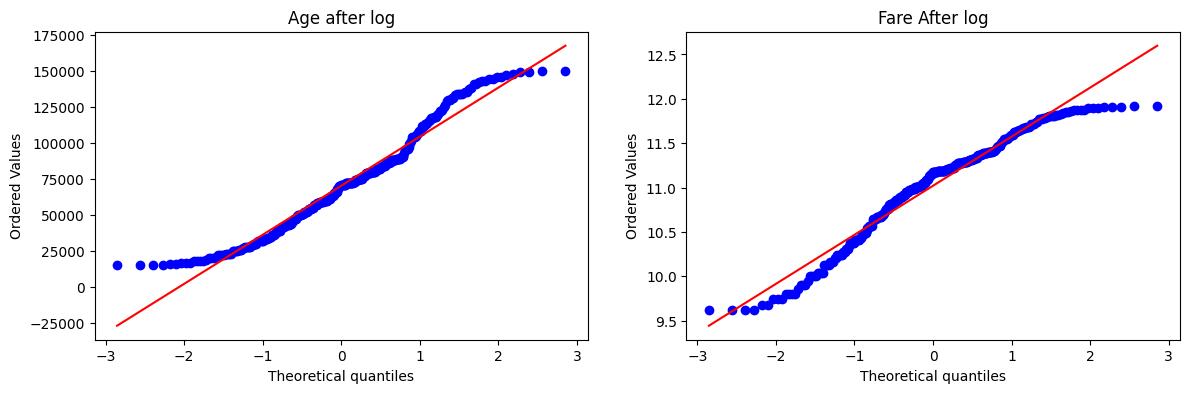

In [44]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stat.probplot(X_train['EstimatedSalary'],dist='norm',plot=plt)
plt.title("Age after log")

plt.subplot(122)
stat.probplot(X_train_transformed['EstimatedSalary'],dist="norm",plot=plt)
plt.title('Fare After log')
plt.show()

In [45]:
X = df.iloc[:,:3]
print(X)
y = df.iloc[:,-1]
print(y)

     Gender  Age  EstimatedSalary
0         0   19            19000
1         0   35            20000
2         1   26            43000
3         1   27            57000
4         0   19            76000
..      ...  ...              ...
395       1   46            41000
396       0   51            23000
397       1   50            20000
398       0   36            33000
399       1   49            36000

[400 rows x 3 columns]
0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64


In [60]:
def  apply_transform(trasform):
    X = df.iloc[:,:3]
    y = df.iloc[:,-1]
    
    trf = ColumnTransformer([("log",FunctionTransformer(trasform),['EstimatedSalary'])],remainder="passthrough")
    
    X_train = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_train,y,scoring="accuracy",cv=10)))
    
    plt.figure(figsize=(14,4))
    
    plt.subplot(121)
    stat.probplot(X['EstimatedSalary'],dist='norm',plot=plt)
    plt.title('Purchased befor transfrom')
    
    plt.subplot(122)
    stat.probplot(X_train[:,2],dist="norm",plot=plt)
    plt.title("Purchased After Transfrom")
    
    plt.show()

Accuracy 0.6425000000000001


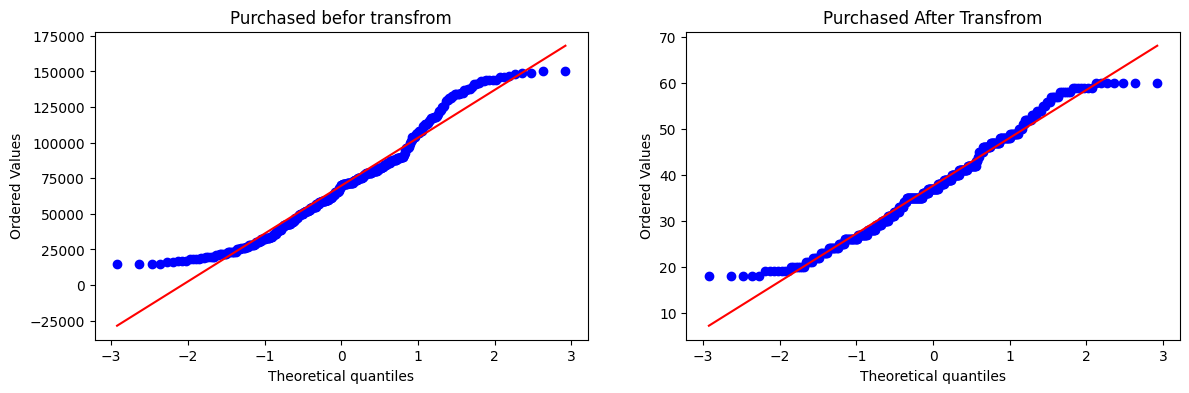

In [61]:
apply_transform(lambda x: x)

In [59]:
df.iloc[:,2]

0      19000
1      20000
2      43000
3      57000
4      76000
       ...  
395    41000
396    23000
397    20000
398    33000
399    36000
Name: EstimatedSalary, Length: 400, dtype: int64